In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os

In [16]:
# URL of the Wikipedia page with the table
url = 'https://en.wikipedia.org/wiki/Wikipedia:Wikipedia_articles_written_in_the_greatest_number_of_languages'

# Send a GET request to fetch the page content
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Find the first table on the page (or modify this if there are multiple tables)
table = soup.find('table')

# Use pandas to parse the HTML table
df = pd.read_html(str(table))[0]

C:\Users\11097\AppData\Local\Temp\ipykernel_7588\3088045917.py:12: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


In [ ]:
# delete the 2nd column
# df = df.drop(df.columns[1], axis=1)

In [ ]:
# delete the 4th column
# df = df.drop(df.columns[3], axis=1)

In [8]:
# check the property of the dataframe
print(df.dtypes)

Category        object
Subcategory     object
Article         object
Languages       object
Last Updated    object
dtype: object


In [19]:
# check the property of each column
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Category      1904 non-null   object
 1   Subcategory   1904 non-null   object
 2   Article       1904 non-null   object
 3   Languages     1904 non-null   int64 
 4   Last Updated  1904 non-null   object
dtypes: int64(1), object(4)
memory usage: 74.5+ KB
None


In [11]:
# show the first 5 rows of the dataframe
print(df.head())

  Category Subcategory        Article       Languages Last Updated
0   Person       Music  David Woodard  334 Wikipedias   2025/03/29
1    Place     Country         Turkey  333 Wikipedias   2025/03/29
2    Place     Country          Japan  324 Wikipedias   2025/03/21
3    Place     Country         Russia  323 Wikipedias   2025/03/21
4    Place     Country  United States  323 Wikipedias   2025/03/21


In [17]:
# delete " Wikipedias" from the "Languages" column
df['Languages'] = df['Languages'].str.replace(' Wikipedias', '').str.strip()

In [18]:
# change the "Languages" column to numeric values
df['Languages'] = pd.to_numeric(df['Languages'], errors='coerce')

In [20]:
# check the property of each column
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Category      1904 non-null   object
 1   Subcategory   1904 non-null   object
 2   Article       1904 non-null   object
 3   Languages     1904 non-null   int64 
 4   Last Updated  1904 non-null   object
dtypes: int64(1), object(4)
memory usage: 74.5+ KB
None


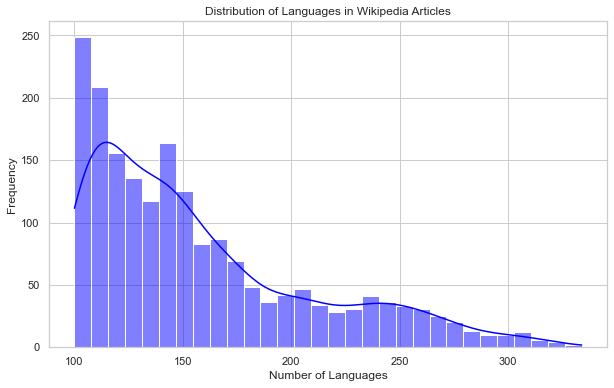

In [24]:
# plot the histogram of the "Languages" column
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df['Languages'], bins=30, kde=True, color='blue')
plt.title('Distribution of Languages in Wikipedia Articles')
plt.xlabel('Number of Languages')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

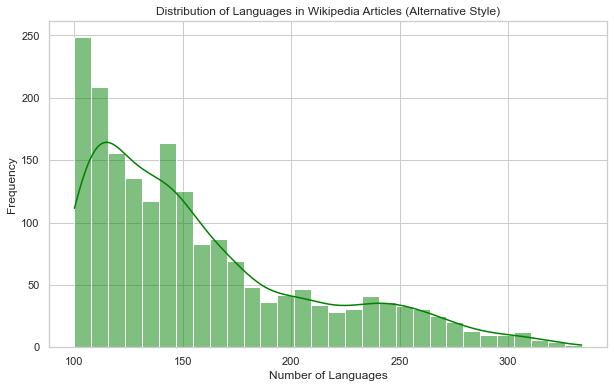

In [25]:
# plot the histogram of the "Languages" column with a different style
plt.figure(figsize=(10, 6))
sns.histplot(df['Languages'], bins=30, kde=True, color='green')
plt.title('Distribution of Languages in Wikipedia Articles (Alternative Style)')
plt.xlabel('Number of Languages')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

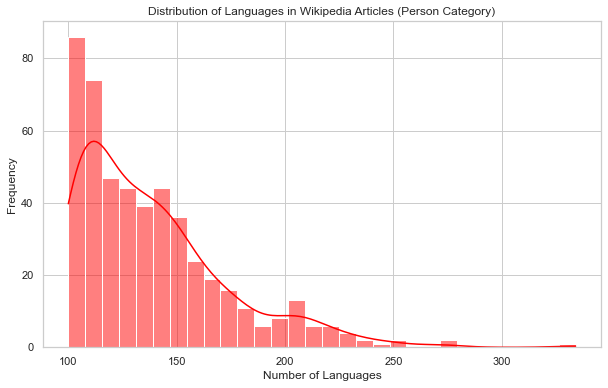

In [26]:
# plot the histogram of the "Languages" columns which has "Person" for the "Category" column
df_person = df[df['Category'] == 'Person']
plt.figure(figsize=(10, 6))
sns.histplot(df_person['Languages'], bins=30, kde=True, color='red')
plt.title('Distribution of Languages in Wikipedia Articles (Person Category)')
plt.xlabel('Number of Languages')
plt.ylabel('Frequency')
plt.grid(True)

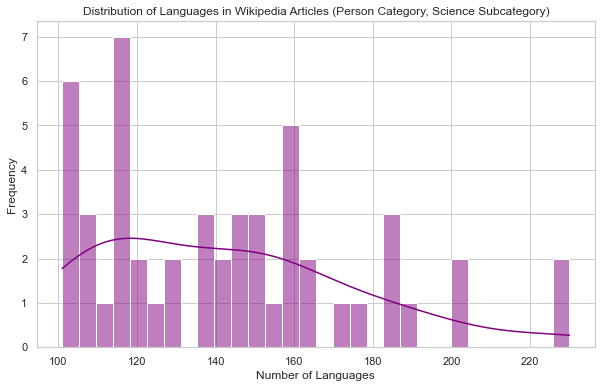

In [27]:
# plot the histogram of the "Languages" columns which has "Person" for the "Category" column and has "Science" for the "Subcategory" column
df_science = df[(df['Category'] == 'Person') & (df['Subcategory'] == 'Science')]
plt.figure(figsize=(10, 6))
sns.histplot(df_science['Languages'], bins=30, kde=True, color='purple')
plt.title('Distribution of Languages in Wikipedia Articles (Person Category, Science Subcategory)')
plt.xlabel('Number of Languages')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [29]:
# count of df_science
print(df_science.count())
# count of df_person
print(df_person.count())

Category        51
Subcategory     51
Article         51
Languages       51
Last Updated    51
dtype: int64
Category        491
Subcategory     491
Article         491
Languages       491
Last Updated    491
dtype: int64


In [32]:
# basic statistics of df_science
print(df_science.describe())
# basic statistics of df_person
print(df_person.describe())
# basic statistics of df
print(df.describe())

        Languages
count   51.000000
mean   142.921569
std     32.950170
min    101.000000
25%    115.500000
50%    140.000000
75%    159.000000
max    230.000000
        Languages
count  491.000000
mean   138.723014
std     34.886824
min    100.000000
25%    111.000000
50%    131.000000
75%    154.000000
max    334.000000
         Languages
count  1904.000000
mean    157.988445
std      52.095489
min     100.000000
25%     116.000000
50%     143.000000
75%     182.000000
max     334.000000


In [ ]:
# Save the table as a CSV file
csv_file_path = os.path.join(os.getcwd(), 'wikipedia_table.csv')
df.to_csv(csv_file_path, index=False)

print("Table saved as 'wikipedia_table.csv'")